In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# Step 1: Load Data
customers = pd.read_csv('Customers.csv')
customers
transactions = pd.read_csv('Transactions.csv')
transactions

# Step 2: Data Preprocessing (Merge Data)
# Merge Customers with Transactions
transactions = transactions.merge(customers, on='CustomerID', how='left')

# Step 3: Feature Engineering
# Aggregate transaction data by customer
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': lambda x: x.mode()[0],  # Most frequent region
}).reset_index()

# Step 4: Standardize Features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price']])

# Step 5: K-Means Clustering
# Choose number of clusters (K) between 2 and 10 based on Elbow or Silhouette method
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

# Step 6: Clustering Evaluation (DB Index)
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Step 7: Visualize Clusters with PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Step 8: Silhouette Score Evaluation
sil_score = silhouette_score(customer_features_scaled, customer_features['Cluster'])
print(f'Silhouette Score: {sil_score}')

# You can experiment with other clustering methods or adjust the number of clusters as needed


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# Step 1: Load Data
customers = pd.read_csv('Customers.csv')
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [3]:
transactions = pd.read_csv('Transactions.csv')
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
# Step 3: Feature Engineering
# Aggregate transaction data by customer
transactions = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Step 3: Feature Engineering
# Aggregate transaction data by customer
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',  # Total quantity purchased
    'Price': 'mean',  # Average price of products purchased
    'Region': lambda x: x.mode()[0],  # Most frequent region (although the region should be the same for each customer)
}).reset_index()

# Check the first few rows of customer features to ensure the 'Region' column is included
print(customer_features.head())

  CustomerID  TotalValue  Quantity       Price         Region
0      C0001     3354.52        12  278.334000  South America
1      C0002     1862.74        10  208.920000           Asia
2      C0003     2725.38        14  195.707500  South America
3      C0004     5354.88        23  240.636250  South America
4      C0005     2034.24         7  291.603333           Asia


In [7]:
# Step 4: Standardize Features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price']])
customer_features_scaled

array([[-6.17014282e-02, -1.22032964e-01,  9.46702248e-02],
       [-8.77743532e-01, -4.48000209e-01, -9.04015921e-01],
       [-4.05857221e-01,  2.03934282e-01, -1.09410928e+00],
       [ 1.03254704e+00,  1.67078689e+00, -4.47701928e-01],
       [-7.83928612e-01, -9.36951078e-01,  2.85581271e-01],
       [ 4.15879421e-01, -1.22032964e-01,  8.67287344e-01],
       [-4.85482293e-01, -7.73967455e-01,  1.12604452e+00],
       [ 4.39970436e-01,  1.18183602e+00, -5.84040413e-01],
       [-1.40630171e+00, -1.58888557e+00,  3.89602086e-01],
       [-9.57166204e-01, -1.22032964e-01, -1.70467406e+00],
       [ 1.43695808e-01,  4.09506590e-02,  3.00323548e-01],
       [ 9.64923716e-01,  1.01885240e+00, -1.37449092e-02],
       [ 1.38575064e+00,  8.55868773e-01,  7.05501167e-01],
       [-1.72239508e+00, -1.75186919e+00, -1.61748649e+00],
       [-1.26353893e+00, -1.42590195e+00,  1.20905974e+00],
       [ 2.22697270e-01, -4.48000209e-01,  1.72067526e+00],
       [ 7.03751732e-01,  1.34481964e+00

In [15]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering (no need to define number of clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_features['Cluster'] = dbscan.fit_predict(customer_features_scaled)




In [17]:
# Step 6: Clustering Evaluation (DB Index)
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 6.28813637624159


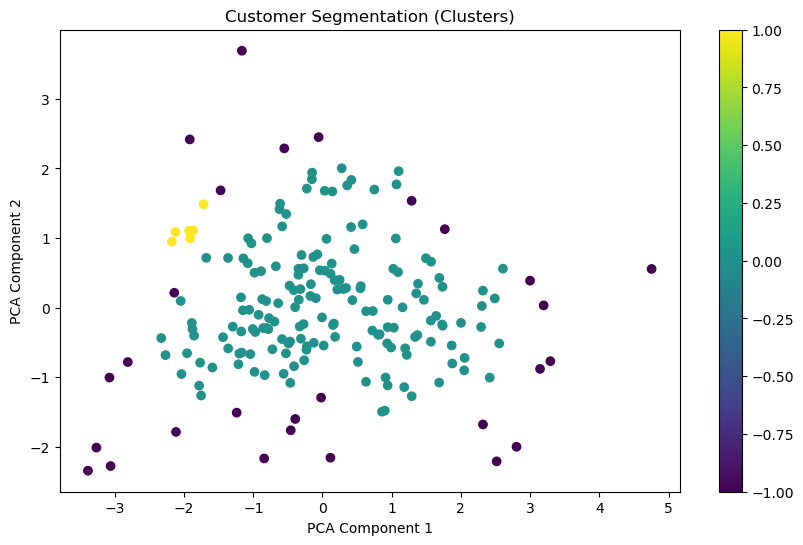

Silhouette Score: 0.15413221583292921


In [19]:
# Step 7: Visualize Clusters with PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Step 8: Silhouette Score Evaluation
sil_score = silhouette_score(customer_features_scaled, customer_features['Cluster'])
print(f'Silhouette Score: {sil_score}')
